# Resultados da busca em grade utilizando todos os parâmetros do dataset

**MLP**
- Paciência: $25$ e $50$
- batch_size: $16$ e $32$
- $\beta_1$: $1$, $0.9$, $0.8$ 
- $\beta_2$: $0.999$, $0.95$, $0.9$
- Épocas: $300$ e $500$
- Função de ativação: $relu, sigmoide$

***Obs:*** *Observamos que todos os resultados utilizando sigmoide apresentaram um desempenho extremamente baixo para prever quando o paciente realmente possui a síndrome dos ovários policístico. Por isso, nos resultados da busca em grade em que aparece "logistic", mudamos para "relu"*

In [18]:
import pandas as pd
import numpy as np
import math
from utilities.show_results import plot_confusion_matrix, get_accuracy, get_precision, f_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from joblib import dump, load

In [2]:
grid = pd.read_csv('data/PCOS_20_chi2.csv')
data = pd.read_csv('data/PCOS_selected_features.csv')

In [3]:
grid.sort_values(by='rank_test_score', inplace=True)

In [4]:
data.head(2)

,PCOS (Y/N),Age (yrs),Height(Cm),Hb(g/dl),Cycle length(days),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Diastolic (mmHg),Follicle No. (L)
0,0,28,152.0,10.48,5,0,1.99,1.99,7.95,3.68,0.68,45.16,17.1,92.0,0,0,0,0,80,3
1,0,36,161.5,11.70,5,0,60.80,1.99,6.73,1.09,3.16,20.09,61.3,92.0,0,0,0,0,70,3


In [5]:
X = data.drop(columns=['PCOS (Y/N)'], axis=1)
y = data["PCOS (Y/N)"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30)

X_train.shape, X_test.shape, (y_test == 1).sum(), (y_test == 0).sum()

((376, 19), (162, 19), 52, 110)

In [7]:
X_train_norm = (X_train - np.min(X_train))/(np.max(X_train) - np.min(X_train))

X_test_norm = (X_test - np.min(X_train))/(np.max(X_train) - np.min(X_train))

C:\Users\Callidus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Callidus\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [8]:
X_train_norm.head(2)

,Age (yrs),Height(Cm),Hb(g/dl),Cycle length(days),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Diastolic (mmHg),Follicle No. (L)
199,0.357143,0.45,0.428571,0.4,0.0,0.000066,0.000014,0.001738,0.001520,0.080250,0.221136,0.004060,0.075000,0.0,0.0,1.0,1.0,0.0,0.095238
121,0.464286,0.20,0.238095,0.3,0.0,0.010961,0.000010,0.001463,0.000222,0.078328,0.211593,0.006164,0.107143,0.0,1.0,0.0,0.0,1.0,0.047619


In [9]:
X_test_norm.head(2)

,Age (yrs),Height(Cm),Hb(g/dl),Cycle length(days),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),TSH (mIU/L),PRL(ng/mL),Vit D3 (ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Hair loss(Y/N),Pimples(Y/N),BP _Diastolic (mmHg),Follicle No. (L)
358,0.500000,0.350,0.317460,0.3,0.0,0.000021,0.000014,0.001229,0.001694,0.124940,0.110451,0.007216,0.107143,1.0,0.0,1.0,0.0,0.861111,0.142857
144,0.607143,0.325,0.428571,0.3,0.0,0.000021,0.000014,0.000788,0.000723,0.065353,0.075172,0.004337,0.214286,0.0,0.0,1.0,0.0,1.000000,0.142857


In [10]:
grid["params"].iloc[0]

"{'activation': 'relu', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.999, 'hidden_layer_sizes': (3, 10), 'max_iter': 700, 'n_iter_no_change': 30, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.8580
PRECISÃO: 0.8580


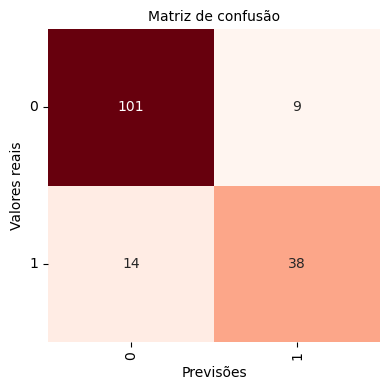

In [11]:
mlp_1 = MLPClassifier(
    verbose= False,
    max_iter=700, 
    activation='relu', 
    hidden_layer_sizes=(3,10),
    batch_size=16,
    beta_1=0.9,
    beta_2=0.999,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=30
)
mlp_1.fit(X_train_norm.values, y_train)

y_pred = mlp_1.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [12]:
grid["params"].iloc[1]

"{'activation': 'relu', 'batch_size': 16, 'beta_1': 0.8, 'beta_2': 0.999, 'hidden_layer_sizes': (5, 8), 'max_iter': 500, 'n_iter_no_change': 30, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.8580
PRECISÃO: 0.8580


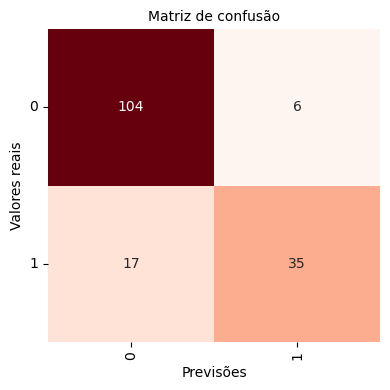

In [13]:
mlp_2 = MLPClassifier(
    verbose= False,
    max_iter=500, 
    activation='relu', 
    hidden_layer_sizes=(5,8),
    batch_size=16,
    beta_1=0.8,
    beta_2=0.999,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=30
)
mlp_2.fit(X_train_norm.values, y_train)

y_pred = mlp_2.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

In [14]:
grid["params"].iloc[2]

"{'activation': 'relu', 'batch_size': 16, 'beta_1': 0.9, 'beta_2': 0.999, 'hidden_layer_sizes': (5, 4), 'max_iter': 700, 'n_iter_no_change': 30, 'solver': 'adam', 'verbose': False}"

ACURÁCIA: 0.8827
PRECISÃO: 0.8827


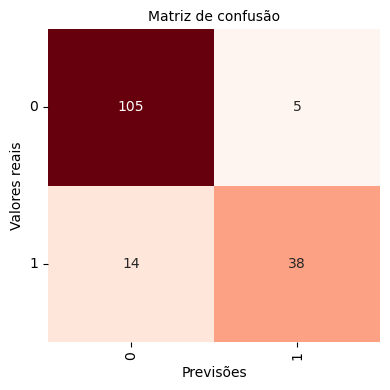

In [15]:
mlp_3 = MLPClassifier(
    verbose= False,
    max_iter=700, 
    activation='relu', 
    hidden_layer_sizes=(5,4),
    batch_size=16,
    beta_1=0.9,
    beta_2=0.999,
    solver='adam',
    early_stopping=True,
    n_iter_no_change=30
)
mlp_3.fit(X_train_norm.values, y_train)

y_pred = mlp_3.predict(X_test_norm.values)
get_accuracy(y_test, y_pred)
get_precision(y_test, y_pred)
plot_confusion_matrix(y_test, y_pred)

ACURÁCIA: 0.5929
PRECISÃO: 0.5929


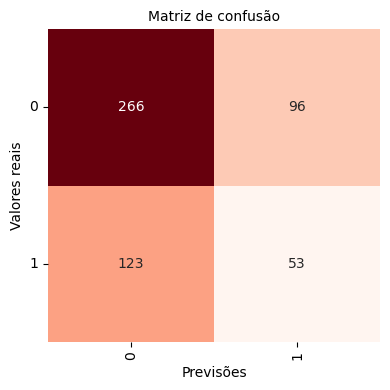

In [25]:
clf = mlp_3.fit(X.values, y)

y_pred = clf.predict(X.values)
get_accuracy(y, y_pred)
get_precision(y, y_pred)
plot_confusion_matrix(y, y_pred)

In [26]:
dump(clf, 'models/pcos-diagnosis-20-params-selectk.joblib')

['models/pcos-diagnosis-20-params-selectk.joblib']